<a href="https://colab.research.google.com/github/Alilson2/Projeto_IA/blob/main/Projeto_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr # Ler arquivos netcdf
from google.colab import drive
import seaborn as sns

!pip install cartopy
import cartopy

import cartopy.crs as ccrs # Escolha do sistema de coordenadas
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import matplotlib.patches as mpatches # Desenhar geometria em um mapa

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 39.8 MB/s eta 0:00:00


In [ ]:
import os
import xarray as xr

# --- Clonar repositório se não existir ---
if not os.path.exists("Projeto_IA"):
    !git clone https://github.com/Alilson2/Projeto_IA.git
else:
    print("📁 Repositório 'Projeto_IA' já existe — pulando o clone.")

# --- Verificar se a pasta foi criada ---
if not os.path.exists("Projeto_IA"):
    raise FileNotFoundError("❌ A pasta 'Projeto_IA' não foi encontrada. O clone pode ter falhado.")
else:
    print("\n✅ Repositório clonado com sucesso!\n")
    print("Arquivos dentro da pasta Projeto_IA:\n", os.listdir("Projeto_IA"))

# --- Localizar arquivos .nc ---
arquivos_nc = [f for f in os.listdir("Projeto_IA") if f.endswith(".nc")]
if not arquivos_nc:
    raise FileNotFoundError("❌ Nenhum arquivo .nc encontrado na pasta Projeto_IA!")
else:
    print("\n📂 Arquivo(s) NetCDF encontrado(s):")
    for f in arquivos_nc:
        print(" -", f)

# --- Montar lista de caminhos ---
ARQUIVO = [os.path.join("Projeto_IA", f) for f in arquivos_nc]

# --- Função para corrigir longitude ---
def corrigir_longitude(ds):
    for coord in ["longitude", "lon"]:
        if coord in ds.coords:
            ds = ds.assign_coords({coord: ((ds[coord] + 180) % 360) - 180})
            ds = ds.sortby(coord)
    return ds

# --- Abrir arquivos com segurança (nova sintaxe) ---
try:
    dados = xr.open_mfdataset(
        ARQUIVO,
        combine='by_coords',
        parallel=True,           # usa múltiplos núcleos
        preprocess=corrigir_longitude,
        combine_attrs='override' # 🟢 substitui o antigo compat='override'
    )
except ValueError as e:
    print("\n⚠️ Erro na combinação — tentando modo 'nested' (concat por tempo)...")
    dados = xr.open_mfdataset(
        ARQUIVO,
        combine='nested',
        concat_dim='valid_time',  # ajuste se sua dimensão temporal tiver outro nome
        parallel=True,
        preprocess=corrigir_longitude,
        combine_attrs='override'
    )

print("\n✅ Dataset carregado com sucesso!\n")
dados


Cloning into 'Projeto_IA'...
remote: Enumerating objects: 187, done.
remote: Counting objects: 100% (187/187), done.
remote: Compressing objects: 100% (185/185), done.
remote: Total 187 (delta 35), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (187/187), 133.31 MiB | 24.20 MiB/s, done.
Resolving deltas: 100% (35/35), done.

✅ Repositório clonado com sucesso!

Arquivos dentro da pasta Projeto_IA:
 ['(FEVEREIRO 2023 - 16a28) 7dc44bd550a6fed4a3ceee541998bb8c.nc', 'MAI 2022 - 16a31.nc', '(NOV 2020-1 a 24).nc', '(DEZ 2020-25 a 31).nc', '(MARÇO 2024 - 1a15) 27b35cf2be7d06ee99adbf9b6c8a7e3d.nc', '(MARÇO 2023 - 1a15) ef5ac9bd28416b585bee81ec1bb1651a.nc', 'JAN 2022 - 16a31.nc', 'SET 2022 - 16a30.nc', 'FEV 2022 - 16a28.nc', '(MAIO 2021-1 a 15).nc', '(Junho 2021-1 a 15).nc', '(ABRIL 2023 - 16a30) 13b26cd78491d801f93e060b3ae0ac83.nc', '(MARÇO 2023 - 16a31) c769088bb86ee3cee8a4fae9a26db382.nc', '(NOVEMBRO 2024 - 1a15) 73449947fd760b6c7e864f371adc2ef.nc', '(DEZEMBRO 2024 - 1a15)

/tmp/ipython-input-125324894.py:39: FutureWarning: In a future version of xarray the default value for join will change from join='outer' to join='exact'. This change will result in the following ValueError: cannot be aligned with join='exact' because index/labels/sizes are not equal along these coordinates (dimensions): 'valid_time' ('valid_time',) The recommendation is to set join explicitly for this case.
  dados = xr.open_mfdataset(
/tmp/ipython-input-125324894.py:39: FutureWarning: In a future version of xarray the default value for join will change from join='outer' to join='exact'. This change will result in the following ValueError: cannot be aligned with join='exact' because index/labels/sizes are not equal along these coordinates (dimensions): 'latitude' ('latitude',) The recommendation is to set join explicitly for this case.
  dados = xr.open_mfdataset(



⚠️ Erro na combinação — tentando modo 'nested' (concat por tempo)...


/tmp/ipython-input-125324894.py:48: FutureWarning: In a future version of xarray the default value for join will change from join='outer' to join='exact'. This change will result in the following ValueError: cannot be aligned with join='exact' because index/labels/sizes are not equal along these coordinates (dimensions): 'latitude' ('latitude',) The recommendation is to set join explicitly for this case.
  dados = xr.open_mfdataset(
/tmp/ipython-input-125324894.py:48: FutureWarning: In a future version of xarray the default value for join will change from join='outer' to join='exact'. This change will result in the following ValueError: cannot be aligned with join='exact' because index/labels/sizes are not equal along these coordinates (dimensions): 'longitude' ('longitude',) The recommendation is to set join explicitly for this case.
  dados = xr.open_mfdataset(



✅ Dataset carregado com sucesso!



<xarray.Dataset> Size: 433MB
Dimensions:     (valid_time: 40920, latitude: 12, longitude: 22)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 327kB 2023-02-16 ... 2021-11-30T2...
  * latitude    (latitude) float64 96B -24.2 -24.2 -24.1 ... -23.4 -23.3 -23.2
  * longitude   (longitude) float64 176B -47.2 -47.19 -47.1 ... -46.2 -46.19
    number      int64 8B 0
    expver      (valid_time) <U4 655kB dask.array<chunksize=(312,), meta=np.ndarray>
Data variables:
    d2m         (valid_time, latitude, longitude) float32 43MB dask.array<chunksize=(312, 11, 11), meta=np.ndarray>
    t2m         (valid_time, latitude, longitude) float32 43MB dask.array<chunksize=(312, 11, 11), meta=np.ndarray>
    slhf        (valid_time, latitude, longitude) float32 43MB dask.array<chunksize=(312, 11, 11), meta=np.ndarray>
    sshf        (valid_time, latitude, longitude) float32 43MB dask.array<chunksize=(312, 11, 11), meta=np.ndarray>
    ssrd        (valid_time, latitude, longitude) float32 43MB dask.array<chunksize=(312, 11, 11), meta=np.ndarray>
    e           (valid_time, latitude, longitude) float32 43MB dask.array<chunksize=(312, 11, 11), meta=np.ndarray>
    u10         (valid_time, latitude, longitude) float32 43MB dask.array<chunksize=(312, 11, 11), meta=np.ndarray>
    v10         (valid_time, latitude, longitude) float32 43MB dask.array<chunksize=(312, 11, 11), meta=np.ndarray>
    sp          (valid_time, latitude, longitude) float32 43MB dask.array<chunksize=(312, 11, 11), meta=np.ndarray>
    tp          (valid_time, latitude, longitude) float32 43MB dask.array<chunksize=(312, 11, 11), meta=np.ndarray>
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-10-27T15:01 GRIB to CDM+CF via cfgrib-0.9.1...

In [ ]:
print(dados['valid_time'])

<xarray.DataArray 'valid_time' (valid_time: 32136)> Size: 257kB
array(['2021-01-01T00:00:00.000000000', '2021-01-01T01:00:00.000000000',
       '2021-01-01T02:00:00.000000000', ..., '2024-12-31T21:00:00.000000000',
       '2024-12-31T22:00:00.000000000', '2024-12-31T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 257kB 2021-01-01 ... 2024-12-31T2...
    number      int64 8B 0
    expver      (valid_time) <U4 514kB dask.array<chunksize=(360,), meta=np.ndarray>
Attributes:
    long_name:      time
    standard_name:  time


In [9]:
import numpy as np
import pandas as pd

def calcula_vapor_umidade(data):
    # Temperatura e ponto de orvalho em Celsius
    t2m_celsius = data["t2m"] - 273.15
    d2m_celsius = data["d2m"] - 273.15

    # 1) Pressão de vapor de saturação (es) em Pa
    es = 610.94 * np.exp(17.625 * t2m_celsius / (243.04 + t2m_celsius))

    # 2) Pressão de vapor real (ev) em Pa
    ev = 610.94 * np.exp(17.625 * d2m_celsius / (243.04 + d2m_celsius))

    # 3) Umidade Relativa (%)
    RH = 100 * ev / es

    # 4) Déficit de Pressão de Vapor (kPa)
    VPD = (es - ev) / 1000

    # Retorna como DataFrame para fácil concatenação
    return pd.DataFrame({
        "es": es,
        "ev": ev,
        "RH": RH,
        "VPD": VPD
    })

# --- Aplicar ao DataFrame original ---
resultados = calcula_vapor_umidade(df_panda)

# Adiciona novas colunas ao df_panda
df_panda = pd.concat([df_panda.reset_index(drop=True), resultados.reset_index(drop=True)], axis=1)

In [10]:
from tqdm import tqdm
import numpy as np
import pandas as pd

def criar_dados(df_panda):
  data = []

  # Lista de variáveis a processar
  variaveis = ['d2m', 't2m', 'u10', 'v10', 'slhf', 'sshf', 'ssrd', 'sp', 'e', 'tp', 'es', 'ev', 'RH', 'VPD']

  for t in tqdm(tempo, desc="Processando tempos"):
      # Filtra as linhas com o tempo atual
      mask = df_panda['valid_time'].values == t

      # Dicionário para armazenar os resultados deste tempo
      stats = {'tempo': t}

      for var in variaveis:
          valores = df_panda[var].values[mask]

          # Se for precipitação ou evaporação, somar; caso contrário, calcular média/mín/máx
          if var in ['e', 'tp']:
              stats[f'{var}_sum'] = np.sum(valores)
          else:
              stats[f'{var}_mean'] = np.mean(valores)
              stats[f'{var}_min'] = np.min(valores)
              stats[f'{var}_max'] = np.max(valores)

      data.append(stats)

  # Converte para DataFrame
  df_resumo = pd.DataFrame(data)
  return df_resumo

Processando tempos: 100%|██████████| 40920/40920 [21:36<00:00, 31.57it/s]


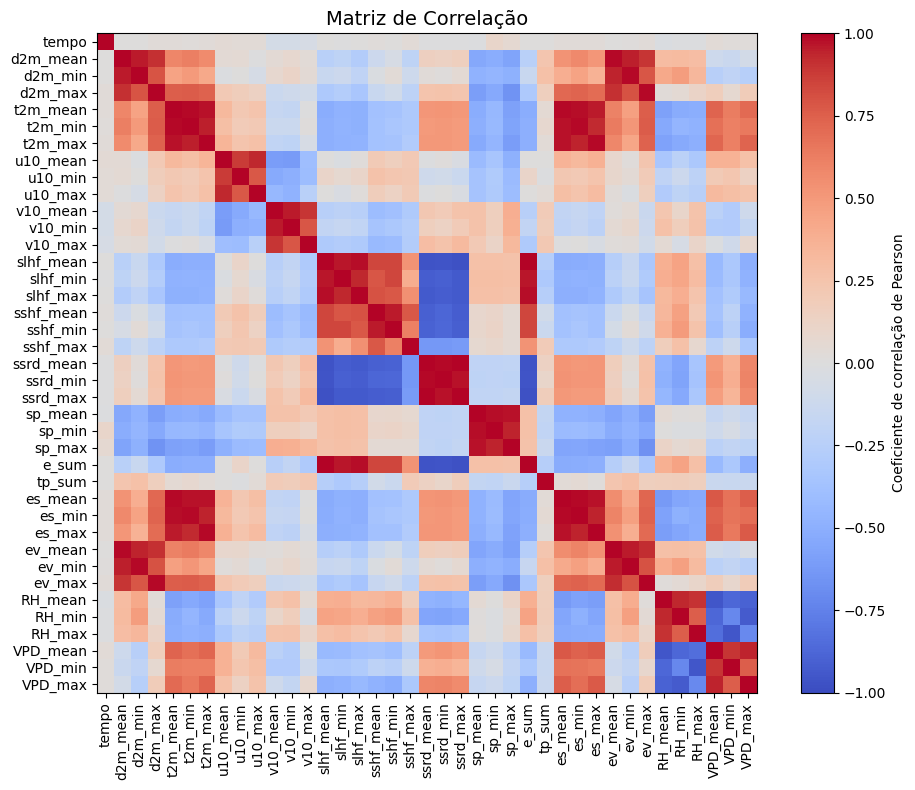

In [12]:
df_resumo=criar_dados(df_panda)
matrix = df_resumo.corr(method='pearson')

plt.figure(figsize=(10, 8))
plt.imshow(matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label="Coeficiente de correlação de Pearson")

plt.title("Matriz de Correlação", fontsize=14)
plt.xticks(range(len(matrix.columns)), matrix.columns, rotation=90)
plt.yticks(range(len(matrix.columns)), matrix.columns)
plt.tight_layout()
plt.show()

In [31]:
# --- 3️⃣ Converter o eixo temporal para pandas.DatetimeIndex ---
tempo = pd.to_datetime(df_resumo['tempo'])

print(tempo)

df_tempo = pd.DataFrame({
    "timestamp": tempo,
    "timestamp_segundos": tempo.view("int64"),   # segundos desde 1970
    "ano": tempo.dt.year,
    "mes": tempo.dt.month,
    "dia": tempo.dt.day,
    "hora": tempo.dt.hour,
    "minuto": tempo.dt.minute,
    "segundo": tempo.dt.second,
    "dia_semana": tempo.dt.dayofweek,
    "dia_do_ano": tempo.dt.dayofyear
})

#print(df_tempo.head())

# Exemplo: seleciona uma variável e um período
# Sort the dataset by valid_time before slicing
dados_sorted = dados.sortby('valid_time')
dados_filtrado = dados_sorted

# Converte para pandas sem estourar RAM
df_panda = dados_filtrado.to_dataframe().reset_index()

# Junta com df_tempo
df_final = pd.merge(
    df_resumo,
    df_tempo,
    left_on='tempo',
    right_on='timestamp',
    how='left'
)

df_final

0       2023-02-16 00:00:00
1       2023-02-16 01:00:00
2       2023-02-16 02:00:00
3       2023-02-16 03:00:00
4       2023-02-16 04:00:00
                ...        
40915   2021-11-30 19:00:00
40916   2021-11-30 20:00:00
40917   2021-11-30 21:00:00
40918   2021-11-30 22:00:00
40919   2021-11-30 23:00:00
Name: tempo, Length: 40920, dtype: datetime64[ns]


/tmp/ipython-input-385338430.py:8: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  "timestamp_segundos": tempo.view("int64"),   # segundos desde 1970


,tempo,d2m_mean,d2m_min,d2m_max,t2m_mean,t2m_min,t2m_max,u10_mean,u10_min,u10_max,...,timestamp,timestamp_segundos,ano,mes,dia,hora,minuto,segundo,dia_semana,dia_do_ano
0,2023-02-16 00:00:00,294.015472,291.955811,298.554199,296.444122,294.798584,300.067383,0.373173,-2.066391,1.500381,...,2023-02-16 00:00:00,1676505600000000000,2023,2,16,0,0,0,3,47
1,2023-02-16 01:00:00,293.808197,291.453247,298.101196,295.953339,293.979248,299.939941,0.842484,-1.463531,1.725372,...,2023-02-16 01:00:00,1676509200000000000,2023,2,16,1,0,0,3,47
2,2023-02-16 02:00:00,293.523102,290.976929,298.002686,295.441193,293.574585,299.670288,1.089323,-0.757278,1.834274,...,2023-02-16 02:00:00,1676512800000000000,2023,2,16,2,0,0,3,47
3,2023-02-16 03:00:00,293.297729,291.116699,297.841675,295.029510,293.311157,298.773560,1.302618,-0.411423,2.198135,...,2023-02-16 03:00:00,1676516400000000000,2023,2,16,3,0,0,3,47
4,2023-02-16 04:00:00,293.135376,291.222168,297.627197,294.676788,293.047852,298.570190,1.265359,-0.603592,2.216232,...,2023-02-16 04:00:00,1676520000000000000,2023,2,16,4,0,0,3,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40915,2021-11-30 19:00:00,292.158478,290.734558,294.602417,297.034943,294.959473,299.257080,1.901740,-1.397943,4.056525,...,2021-11-30 19:00:00,1638298800000000000,2021,11,30,19,0,0,1,334
40916,2021-11-30 20:00:00,292.157135,290.717163,294.393250,296.077484,294.227295,298.667480,0.446729,-2.950483,2.960894,...,2021-11-30 20:00:00,1638302400000000000,2021,11,30,20,0,0,1,334
40917,2021-11-30 21:00:00,292.157318,290.587585,293.990051,295.482513,293.981567,297.824402,-0.278938,-3.165863,1.927155,...,2021-11-30 21:00:00,1638306000000000000,2021,11,30,21,0,0,1,334
40918,2021-11-30 22:00:00,292.004669,290.676636,293.348755,294.697845,293.305725,297.009583,-0.313862,-2.864243,0.953079,...,2021-11-30 22:00:00,1638309600000000000,2021,11,30,22,0,0,1,334


In [32]:
df_final.drop(columns=['tempo', 'timestamp'], inplace=True)
df_final.drop(columns=['ano','mes','dia','hora','minuto','segundo','dia_semana','dia_do_ano'], inplace=True)
df_final

,d2m_mean,d2m_min,d2m_max,t2m_mean,t2m_min,t2m_max,u10_mean,u10_min,u10_max,v10_mean,...,ev_mean,ev_min,ev_max,RH_mean,RH_min,RH_max,VPD_mean,VPD_min,VPD_max,timestamp_segundos
0,294.015472,291.955811,298.554199,296.444122,294.798584,300.067383,0.373173,-2.066391,1.500381,-1.522999,...,2472.828054,2166.415518,3238.739454,86.293643,79.968569,94.600468,0.387748,0.160668,0.555422,1676505600000000000
1,293.808197,291.453247,298.101196,295.953339,293.979248,299.939941,0.842484,-1.463531,1.725372,-1.326960,...,2441.994356,2099.323726,3152.547773,87.816484,78.693656,96.628951,0.335898,0.105433,0.569913,1676509200000000000
2,293.523102,290.976929,298.002686,295.441193,293.574585,299.670288,1.089323,-0.757278,1.834274,-1.305583,...,2399.899192,2037.426556,3134.072322,89.017480,78.187047,98.444227,0.293337,0.045937,0.568410,1676512800000000000
3,293.297729,291.116699,297.841675,295.029510,293.311157,298.773560,1.302618,-0.411423,2.198135,-1.699287,...,2365.485415,2055.421254,3104.079061,89.993668,81.472671,98.180869,0.261127,0.053170,0.478986,1676516400000000000
4,293.135376,291.222168,297.627197,294.676788,293.047852,298.570190,1.265359,-0.603592,2.216232,-2.350717,...,2340.203601,2069.092026,3064.516211,91.016925,83.150597,96.642979,0.231744,0.079784,0.421044,1676520000000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40915,292.158478,290.734558,294.602417,297.034943,294.959473,299.257080,1.901740,-1.397943,4.056525,-0.435158,...,2196.366281,2006.550437,2551.725284,74.283637,64.523077,83.840768,0.764668,0.430581,1.141539,1638298800000000000
40916,292.157135,290.717163,294.393250,296.077484,294.227295,298.667480,0.446729,-2.950483,2.960894,-0.739654,...,2195.373086,2004.350339,2519.226157,78.670847,68.584875,87.485991,0.599827,0.315744,0.946925,1638302400000000000
40917,292.157318,290.587585,293.990051,295.482513,293.981567,297.824402,-0.278938,-3.165863,1.927155,-1.093262,...,2195.083405,1988.028108,2457.602172,81.559369,71.462988,88.879607,0.500083,0.281900,0.843543,1638306000000000000
40918,292.004669,290.676636,293.348755,294.697845,293.305725,297.009583,-0.313862,-2.864243,0.953079,-1.122139,...,2174.126993,1999.232714,2362.309011,84.749107,73.991663,91.498423,0.394695,0.207528,0.768038,1638309600000000000


In [47]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold

# --- 1️⃣ Seleciona apenas colunas numéricas ---
num_cols = df_resumo.select_dtypes(include=[np.number]).columns.tolist()

X = df_resumo[num_cols].copy()

# --- 2️⃣ Substitui valores NaN temporariamente ---
# Você pode mudar a estratégia: 'mean', 'median' ou 0
X = X.fillna(X.mean())

# --- 3️⃣ Define amostra para o ajuste do scaler ---
sample_frac = 0.01  # 1% da base para calibrar
sample = X.sample(frac=sample_frac, random_state=42)

# --- 4️⃣ Ajusta o scaler apenas na amostra ---
scaler = MinMaxScaler()
scaler.fit(sample)

# --- 5️⃣ Normaliza incrementalmente em blocos ---
num_chunks = 100
X_scaled_chunks = []

for i, chunk in enumerate(np.array_split(X, num_chunks)):
    print(f"🔹 Normalizando bloco {i+1}/{num_chunks} ({len(chunk)} linhas)")
    chunk_scaled = scaler.transform(chunk)
    X_scaled_chunks.append(chunk_scaled)

# --- 6️⃣ Reconstrói o DataFrame normalizado ---
X_scaled = np.vstack(X_scaled_chunks)
X_scaled = pd.DataFrame(X_scaled, columns=num_cols, index=X.index)

print("✅ Normalização concluída!")

# --- 7️⃣ Separa features e alvo ---
if 'tp_sum' in X_scaled.columns:
    Y_Norm = X_scaled['tp_sum']
    X_Norm = X_scaled.drop(columns=['tp_sum'])
else:
    print("⚠️ Coluna 'tp_sum' não encontrada no DataFrame numérico.")
    Y_Norm = None
    X_Norm = X_scaled



/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


🔹 Normalizando bloco 1/100 (410 linhas)
🔹 Normalizando bloco 2/100 (410 linhas)
🔹 Normalizando bloco 3/100 (410 linhas)
🔹 Normalizando bloco 4/100 (410 linhas)
🔹 Normalizando bloco 5/100 (410 linhas)
🔹 Normalizando bloco 6/100 (410 linhas)
🔹 Normalizando bloco 7/100 (410 linhas)
🔹 Normalizando bloco 8/100 (410 linhas)
🔹 Normalizando bloco 9/100 (410 linhas)
🔹 Normalizando bloco 10/100 (410 linhas)
🔹 Normalizando bloco 11/100 (410 linhas)
🔹 Normalizando bloco 12/100 (410 linhas)
🔹 Normalizando bloco 13/100 (410 linhas)
🔹 Normalizando bloco 14/100 (410 linhas)
🔹 Normalizando bloco 15/100 (410 linhas)
🔹 Normalizando bloco 16/100 (410 linhas)
🔹 Normalizando bloco 17/100 (410 linhas)
🔹 Normalizando bloco 18/100 (410 linhas)
🔹 Normalizando bloco 19/100 (410 linhas)
🔹 Normalizando bloco 20/100 (410 linhas)
🔹 Normalizando bloco 21/100 (409 linhas)
🔹 Normalizando bloco 22/100 (409 linhas)
🔹 Normalizando bloco 23/100 (409 linhas)
🔹 Normalizando bloco 24/100 (409 linhas)
🔹 Normalizando bloco 25/1

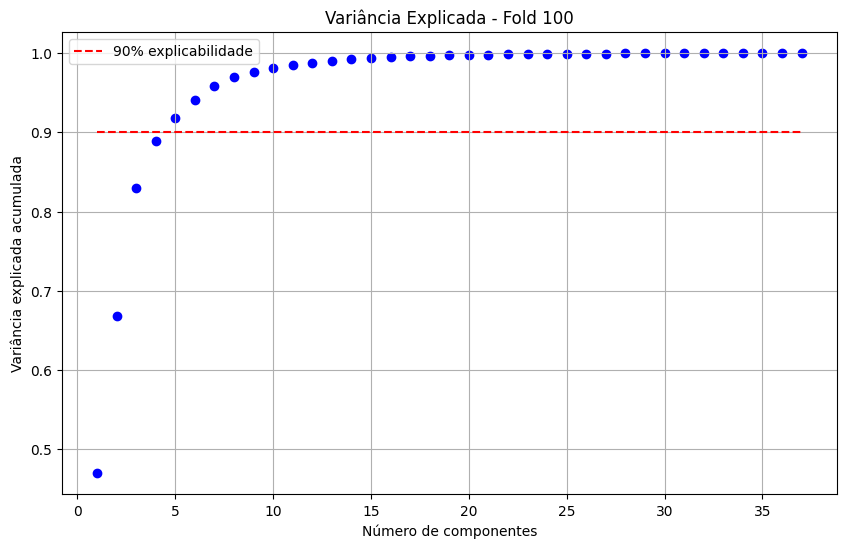

90% dos dados são explicados com 5 componentes.


In [51]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_Norm)
explainability = np.cumsum(pca.explained_variance_ratio_)

# Plot da variância explicada acumulada
factors = np.arange(1, X_Norm.shape[1] + 1)
plt.figure(figsize=(10, 6))
plt.scatter(factors, explainability, color='b')
plt.hlines(0.9, 1, factors[-1], colors='r', linestyle='--', label='90% explicabilidade')
plt.xlabel('Número de componentes')
plt.ylabel('Variância explicada acumulada')
plt.title(f'Variância Explicada - Fold {i+1}')
plt.legend()
plt.grid(True)
plt.show()

p = np.argmax(explainability >= 0.90) + 1
p = max(p, 2)  # garante pelo menos 2 componentes
print(f'90% dos dados são explicados com {p} componentes.')

# Refaz o PCA com o número de componentes selecionado
pca_optimal = PCA(n_components=p)
X_Norm_transformed = pca_optimal.fit_transform(X_Norm)

In [53]:
from sklearn.model_selection import KFold

if Y_Norm is not None:
    kf = KFold(n_splits=3, random_state=42, shuffle=True)

    # Listas para armazenar os folds
    X_train_folds, X_test_folds = [], []
    y_train_folds, y_test_folds = [], []

    fold = 1
    for train_index, test_index in kf.split(X_Norm):
        print(f"\n=== Fold {fold} ===")

        # Divisão treino/teste usando iloc (pandas)
        X_train = X_Norm.iloc[train_index]
        X_test = X_Norm.iloc[test_index]
        y_train = Y_Norm.iloc[train_index]
        y_test = Y_Norm.iloc[test_index]

        print(f"Shape X_train: {X_train.shape}, X_test: {X_test.shape}")

        # Armazena os folds para uso posterior
        X_train_folds.append(X_train)
        X_test_folds.append(X_test)
        y_train_folds.append(y_train)
        y_test_folds.append(y_test)

        fold += 1

else:
    print("⚠️ Não foi possível prosseguir com a divisão em folds sem uma variável alvo.")



=== Fold 1 ===
Shape X_train: (27280, 37), X_test: (13640, 37)

=== Fold 2 ===
Shape X_train: (27280, 37), X_test: (13640, 37)

=== Fold 3 ===
Shape X_train: (27280, 37), X_test: (13640, 37)


In [54]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Listas para armazenar métricas
r2_train_list, r2_test_list = [], []
mse_train_list, mse_test_list = [], []
mae_train_list, mae_test_list = [], []

for i in range(len(X_train_folds)):
    fold = i + 1
    print(f"\n===== Fold {fold} =====")

    # Modelode regressão linear
    a = 0.5
    ridgeReg = Ridge(alpha=a)
    ridgeReg.fit(X_train_folds[i], np.ravel(y_train_folds[i]))  # garante y 1D

    # Predições
    y_pred_train = ridgeReg.predict(X_train_folds[i])
    y_pred_test  = ridgeReg.predict(X_test_folds[i])

    # Métricas
    r2_train = r2_score(y_train_folds[i], y_pred_train)
    r2_test  = r2_score(y_test_folds[i], y_pred_test)
    mse_train = mean_squared_error(y_train_folds[i], y_pred_train)
    mse_test  = mean_squared_error(y_test_folds[i], y_pred_test)
    mae_train = mean_absolute_error(y_train_folds[i], y_pred_train)
    mae_test  = mean_absolute_error(y_test_folds[i], y_pred_test)

    print(f"[Fold {fold}] R² Treino: {r2_train:.4f} | R² Teste: {r2_test:.4f}")
    print(f"[Fold {fold}] MSE Treino: {mse_train:.4f} | MSE Teste: {mse_test:.4f}")
    print(f"[Fold {fold}] MAE Treino: {mae_train:.4f} | MAE Teste: {mae_test:.4f}")

    # Salva o resultado das métricas
    r2_train_list.append(r2_train)
    r2_test_list.append(r2_test)
    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)
    mae_train_list.append(mae_train)
    mae_test_list.append(mae_test)


===== Fold 1 =====
[Fold 1] R² Treino: 0.4761 | R² Teste: 0.4789
[Fold 1] MSE Treino: 0.0054 | MSE Teste: 0.0054
[Fold 1] MAE Treino: 0.0411 | MAE Teste: 0.0413

===== Fold 2 =====
[Fold 2] R² Treino: 0.4786 | R² Teste: 0.4739
[Fold 2] MSE Treino: 0.0054 | MSE Teste: 0.0054
[Fold 2] MAE Treino: 0.0414 | MAE Teste: 0.0413

===== Fold 3 =====
[Fold 3] R² Treino: 0.4775 | R² Teste: 0.4762
[Fold 3] MSE Treino: 0.0054 | MSE Teste: 0.0054
[Fold 3] MAE Treino: 0.0415 | MAE Teste: 0.0415



===== Fold 1 =====
[Fold 1] R² Treino: 0.9723 | R² Teste: 0.8188


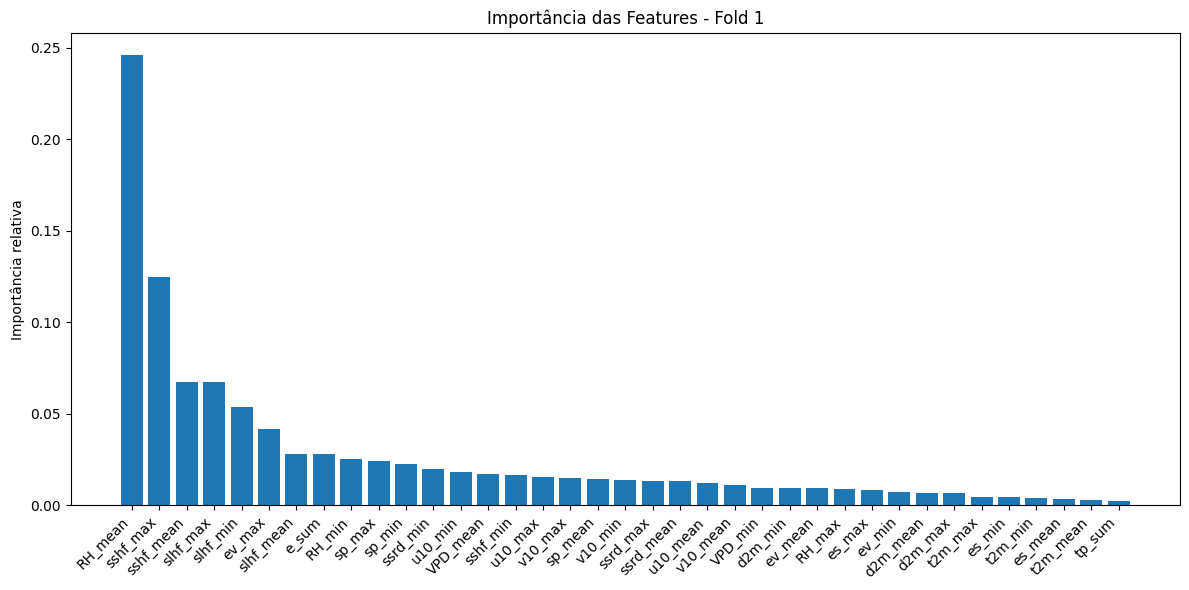


===== Fold 2 =====
[Fold 2] R² Treino: 0.9723 | R² Teste: 0.8021


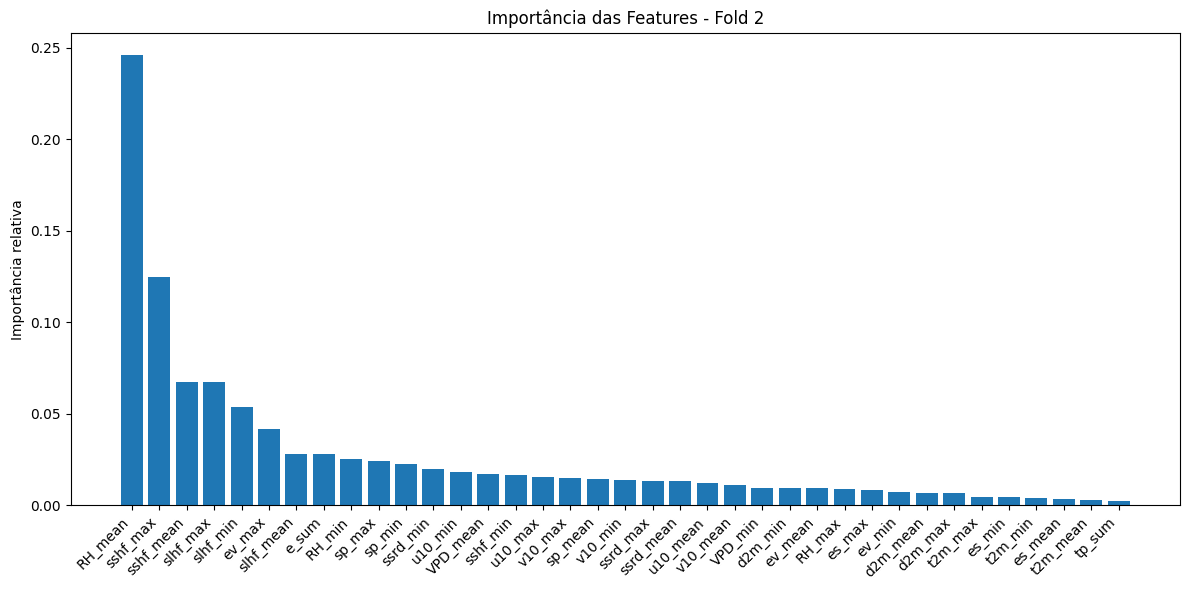


===== Fold 3 =====
[Fold 3] R² Treino: 0.9723 | R² Teste: 0.8082


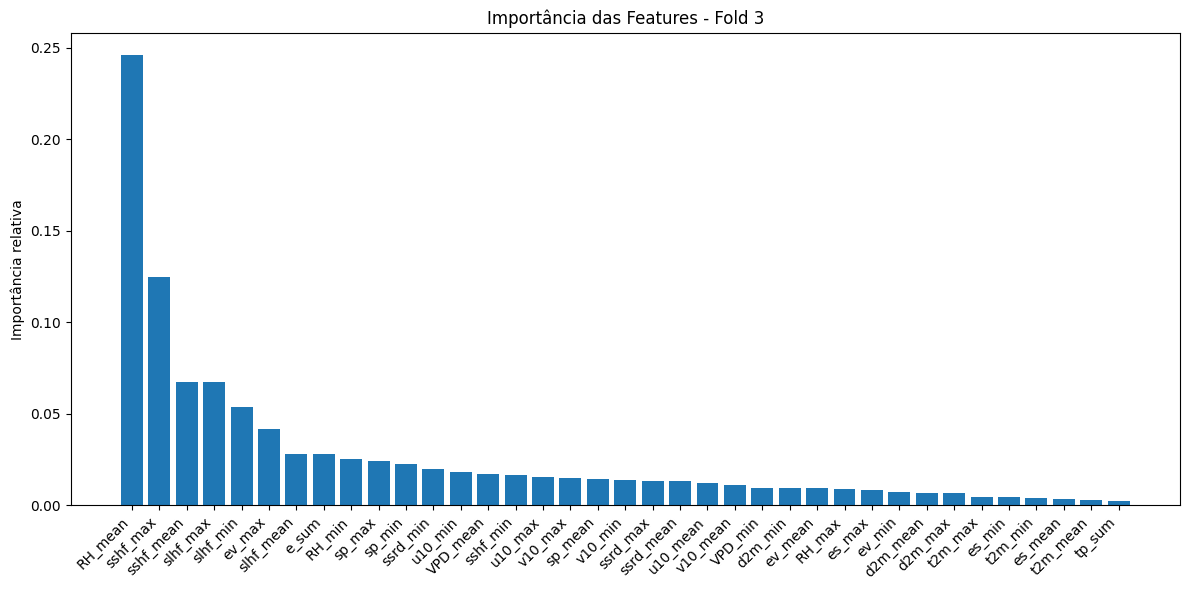

In [57]:
from sklearn.ensemble import RandomForestRegressor

# Loop de treino e avaliação por folds
rf_models = []

for i in range(len(X_train_folds)):
    print(f"\n===== Fold {i+1} =====")

    # Treina RandomForestRegressor
    clf = RandomForestRegressor(random_state=42)
    clf.fit(X_train_folds[i], np.ravel(y_train_folds[i]))  # garante y 1D

    # Armazena modelo
    rf_models.append(clf)

    # Avaliação do modelo
    r2_train = clf.score(X_train_folds[i], y_train_folds[i])
    r2_test = clf.score(X_test_folds[i], y_test_folds[i])
    print(f"[Fold {i+1}] R² Treino: {r2_train:.4f} | R² Teste: {r2_test:.4f}")